# 1. 실루엣 분석의 개요
- 군집화 평가 방법으로 실루엣 분석(Silhouette analysis)이 있다.
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것이다.

<br>

- 실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 함
- 실루엣 계수는 개별 데이터가 가지는 군집화 지표
- 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝거나 다른 군집과 얼마나 멀리 분리돼 있는지를 나타내는 지표
![image](https://user-images.githubusercontent.com/70187490/132933481-88227ce3-74d8-4078-833a-9f4d8e389bce.png)


- 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i)
- 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산됨
- 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)이며 이 값을 정규화하기 위해 MAX( a(i), b(i) ) 값으로 나눔
$$s(i)-\frac{( \ b(i)-a(i) \ )}{max( \ a(i), \ b(i) \ )}$$
- 실루엣 계수는 -1에서 1 사이의 값을 가지며, 
- 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 
- 0에 가까울수록 근처의 군집과 가까워진다는 것을 의미
- -값은 아예 다른 군집에 데이터 포인트가 할당됐음을 의미

<br>

- 사이킷런의 실루엣분석 메서드
    - sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds):   
    인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환함  
      
    - sklearn.metrics.silhoutte_score(X, labels, metrics='euclidean', sample_size=None, **kwds):  
    인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환함  
    즉, np.mean(silhouette_samples())  
    일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있다.  
    하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없다.

<br>

좋은 군집화가 되기 위한 조건
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score( ) 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋다.
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함  
즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함  
만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님

> 붓꽃 데이터 세트를 이용한 군집 평가

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head()

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


- 평균 실루엣 계수 값이 0.553인데 비해 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타내고 있음
- 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문
> 군집별 평균 실루엣 계수 값을 알아보기

In [2]:
irisDF.groupby('cluster')['silhouette_coeff'].mean().to_frame()

,silhouette_coeff
cluster,
0,0.451105
1,0.798140
2,0.417320


# 2. 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 최적의 군집 개수로 군집화가 잘 된것은 아님
- 특정 군집 내의 실루엣 계수만 너무 높고, 다른 군집은 내부 데이터 끼리의 거리거 너무 떨어져 있는 경우가 발생할 수 있음
- 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있음

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4, 
                  cluster_std=1,
                  center_box=(-10, 10), 
                  shuffle=True,
                  random_state=1)

def sklearn_visualize_silhouette(n_cluster):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # 첫번째 subplot은 silhouette plot
    # silhouette 계수는 -1에서 1까지이지만 
    # 이 예에서는 -0.1에서 1까지 이다.
    ax1.set_xlim([-0.1, 1])
    # (n_cluster+1) * 10은 실루엣 사이에 공백을 넣기 위한 것
    # 개별 군집을 명확하게 구분하기 위한 그림
    ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])

    # n_cluster로 cluster를 초기화시키고 random_state로 값을 고정함
    clusterer = KMeans(n_clusters=n_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # silhouette_score는 모든 샘플로부터의 평균값을 반환
    # 이는 형성된 cluster의 밀도와 각 데이터가 얼마나 분리되었나를 주기 위함
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('클러스터의 수=', n_cluster, '\n'
          '평균 silhouette 점수=', silhouette_avg)
    
    # 각 샘플들로부터 silhouette score을 구한다.
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # y축에서 실루엣 plot들을 조금 띄워주기 위함
    y_lower = 10
    for i in range(n_cluster):
        # 클러스터 i에 속하는 샘플의 실루엣 점수를 집계하고 정렬
        ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # 0, 1, 2, 3의 클러스터의 값을 표현해주기 위해 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # 새로운 y_lower 계산하여 다음 plot을 위로 올리기 위함
        # 다시 말해 하나의 클러스터의 실루엣을 그리고 y의 최대값에 10을 더한 수가
        # 다음 plot의 최소값이 되어 붕 띄워주게 한다.
        y_lower = y_upper + 10
    
    ax1.set_title('각각의 클러스터의 silhouette plot')
    ax1.set_xlabel('silhouette 계수 값',fontsize=14)
    ax1.set_ylabel('클러스터', fontsize=14)
    
    # 모든 값들로 부터 나온 평균 silhouette score을 수직선으로 나타냄
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
    
    ax1.set_yticks([]) # y축의 값들을 지움
    ax1.set_xticks([-.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 실제 cluster들이 어떻게 형성 되어있는지에 대한 2번째 plot
    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_cluster)
    ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # 클러스터들을 labeling한다.
    # 클러스터들의 중앙에 어떠한 클러스터에 소속하는지를 표시한다.
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' %i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title('실제 클러스터 데이터의 산점도')
    ax2.set_xlabel('1번째 feature의 feature space', fontsize=14)
    ax2.set_ylabel('2번째 feature의 feature space', fontsize=14)
    
    plt.suptitle(('n_cluster가 %d 일때 KMeans의 cluster들에 대한 Silhouette 분석' %n_cluster), fontsize=16, fontweight='bold')

클러스터의 수= 2 
평균 silhouette 점수= 0.7049787496083262


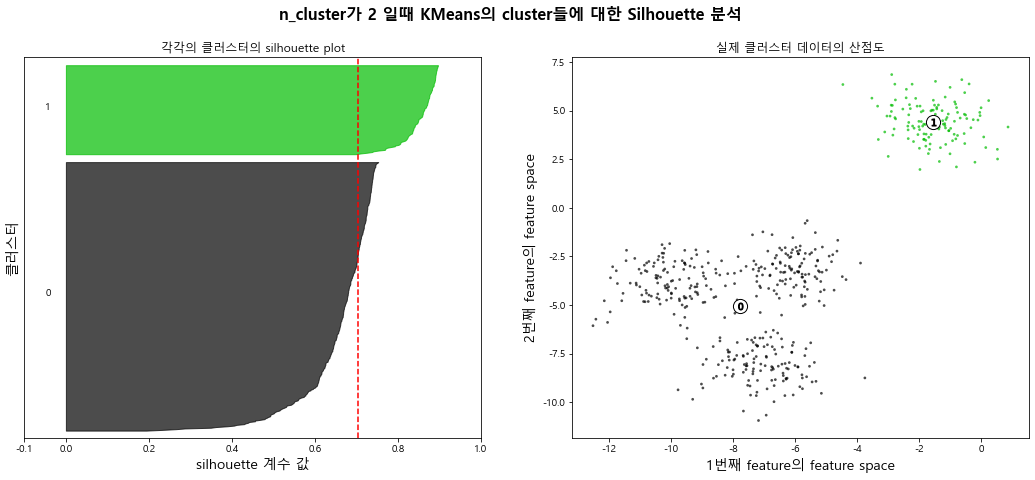

In [4]:
sklearn_visualize_silhouette(2)

첫 번째 경우는 군집의 개수를 2개로 정했을 때  
- 평균 실루엣 계수는 0.704로 매우 높게 나타났지만 이것이 과연 좋은 군집화일까?
- 1번 군집의 모든 데이터는 평균 실루엣 계수 값이 평균 이상이지만
- 2번 군집의 대다수의 데이터가 평균 실루엣 계수 값의 평균 이하

<br>

- 오른쪽 산점도를 살펴보았을 때,   
- 1번 군집의 경우 0번 군집과 멀리 떨어져 있고 내부 데이터 끼리도 잘 뭉쳐여 있음
- 하지만 0번 군집의 경우 내부 데이터끼리 많이 떨어져 있음

클러스터의 수= 3 
평균 silhouette 점수= 0.5882004012129721


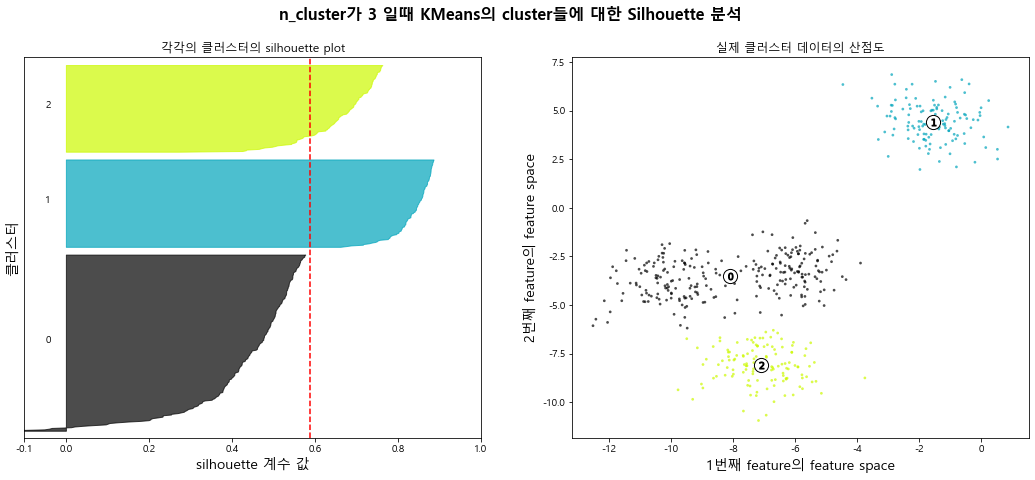

In [5]:
sklearn_visualize_silhouette(3)

군집의 개수가 3개일 경우엔  
- 전체 데이터의 평균 실루엣 계수값은 약 0.588
- 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만
- 0번의 경우 모두 평균보다 낮다.  

<br>

오른쪽 그림을 보면  
- 0번의 경우 내부 데이터 간의 거리도 멀지만
- 2번 군집과도 가깝게 위치하고 있기 때문

클러스터의 수= 4 
평균 silhouette 점수= 0.6505186632729437


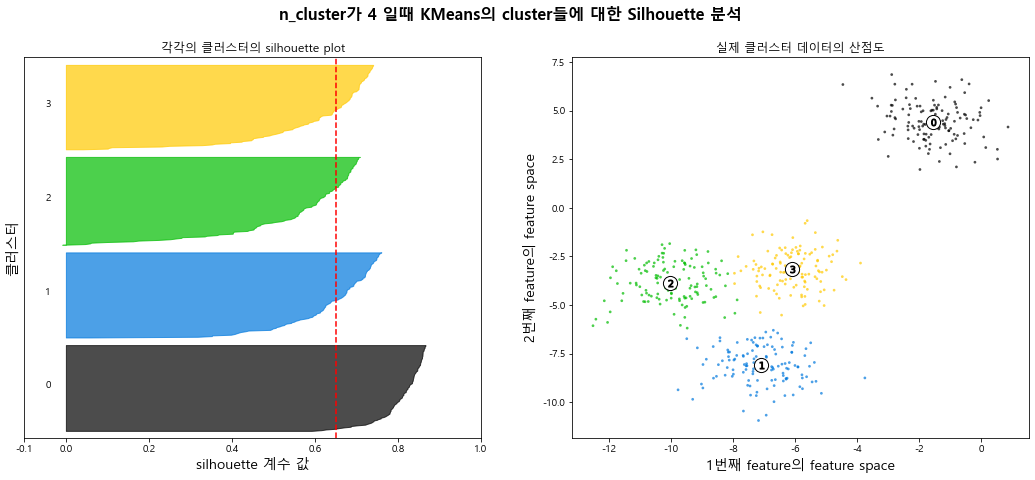

In [6]:
sklearn_visualize_silhouette(4)

군집이 4개인 경우
- 실루엣 계수 값은 약 0.65
- 개별 군집의 평균 실루엣 계수값이 비교적 균일하게 위치하고 있음
- 1번 균집의 경우 모든 데이터가 평균보다 높은 계수 값을 가지고 있으며, 
- 0번, 2번의 경우 절반 이상이 평균보다 높은 계수 값을
- 3번의 경우에만 1/3 정도가 평균보다 높은 계수값을 가지고 있음  

**군집이 2개인 경우보다는 평균 실루엣 계수값이 작지면 4개인 경우가 가장 이상적인 군집화 개수**

클러스터의 수= 5 
평균 silhouette 점수= 0.5745566973301872


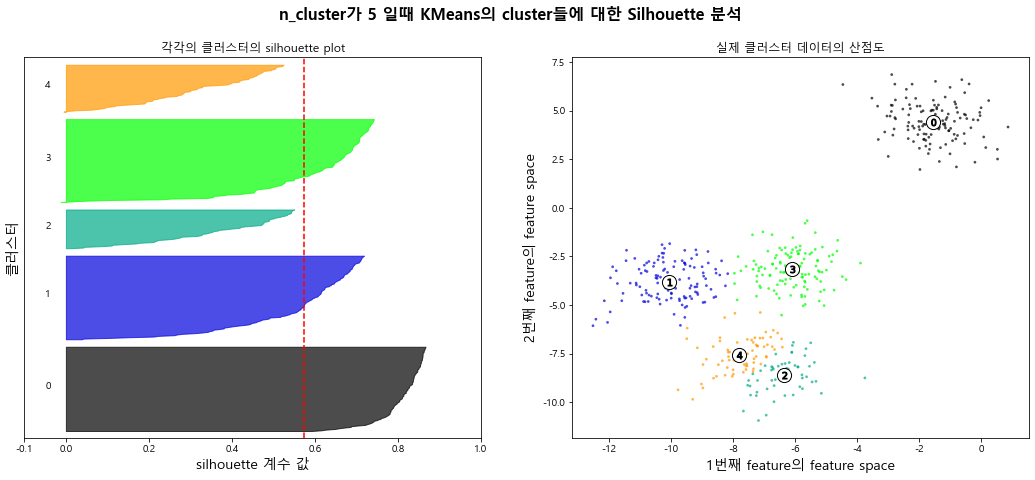

In [7]:
sklearn_visualize_silhouette(5)

In [14]:
def visualize_silhouette(cluster_lists, X_features):
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=( n_cols *4, 4), nrows=1, ncols=n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링을 수행하고 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster: ' + str(n_cluster) + '\n' \
                           'Silhouette Score: ' + str(round(sil_avg,3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, .2, .4, .6, .8, 1])
        # 클러스터링 갯수별로 fill_betweenx( ) 형태의 막대그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0,
                                   ith_cluster_sil_values, facecolor=color, 
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        
        axs[ind].axvline(x=sil_avg, color='red', linestyle='--')

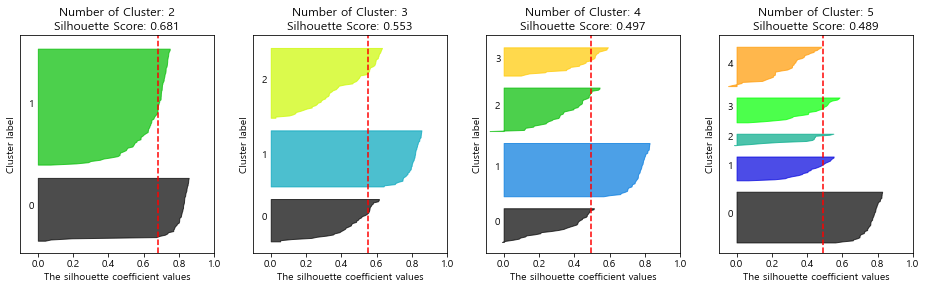

In [15]:
visualize_silhouette([2, 3, 4, 5], iris.data)

- 붓꽃 데이터를 K-평균으로 군집화할 경우 군집 개수를 2개로 하는 것이 가장 좋아보임
- 다른 군집의 경우 평균 실루엣 계수 값도 2보다도 작을 뿐더러
- 1번 군집과 다른 0, 2번 군집과의 실루엣 계수와의 편차가 큼

<br>

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 
- 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행시간이 크게 늘어남
- 더불어 Computing Cost 또한 상당하여 몇만건 이상의 데이터의 경우 개인용 PC에서는 오류가 날 가능성이 있다.